# Notebook for checking latency

In [1]:
# each actor gets there own latency dataframe to check the time of the run step
# concatenate frames together to get total latency for a given frame 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# with spike counts included

In [2]:
gen_df = pd.read_pickle("../latency/generator_acquisition_debug_False_netgear_True_latency.pkl")
processor_df = pd.read_pickle("../latency/processor_acquisition_latency_netgear.pkl")
model_df = pd.read_pickle("../latency/model_acquisition_latency.pkl")
viz_df = pd.read_pickle("../latency/visual_acquisition_latency.pkl")
pattern_df = pd.read_pickle("../latency/pattern_acquistion_latency.pkl")

## Generator Latency

In [3]:
x = list(gen_df["frame number"])
y = list(gen_df["latency"])

In [4]:
print(sum(y) / len(y))

2.807835936063939


Text(0.5, 1.0, 'Generator Latency')

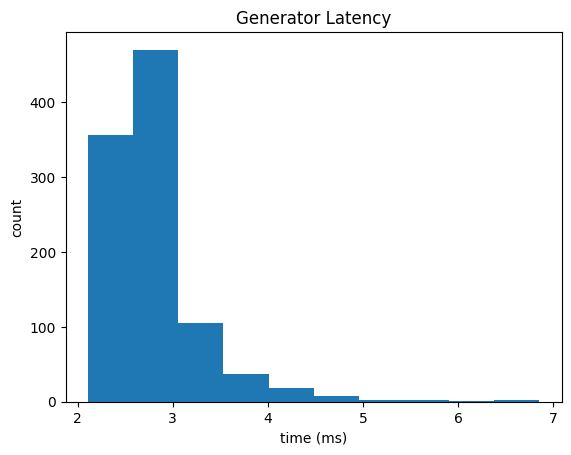

In [5]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Generator Latency")

## Processor Latency

In [6]:
x = list(processor_df["frame number"])
y = list(processor_df["latency"])

In [7]:
print(sum(y) / len(y))

4.089171350462488


Text(0.5, 1.0, 'Processing Time')

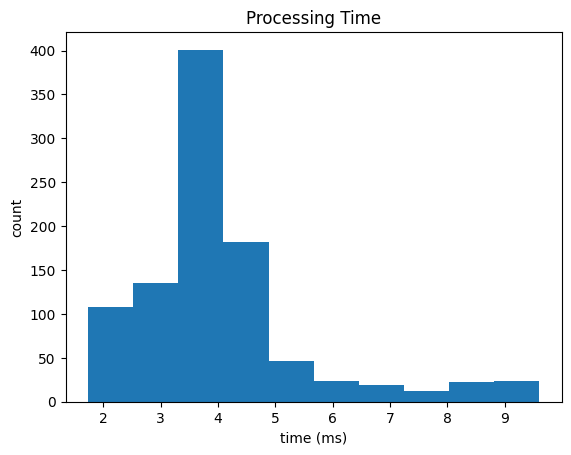

In [8]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Processing Time")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc88e356ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc88e267290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc88e2651d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc88e2749d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc88e275590>],
 'means': []}

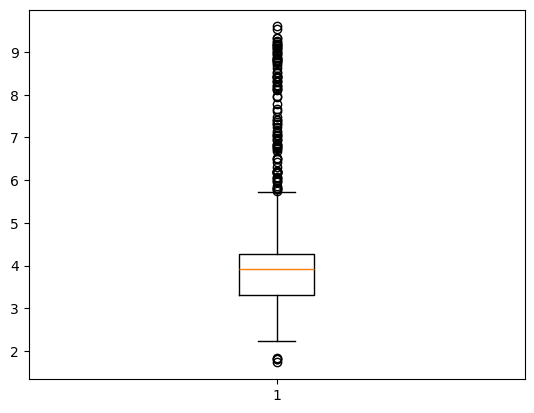

In [9]:
plt.boxplot(np.array(processor_df["latency"]))

## Total Latency

In [10]:
gen_y = list(gen_df["latency"])[27:]

In [11]:
proc_y = list(processor_df["latency"])[27:]

In [12]:
total_latency = [x + y for x, y in zip(gen_y, proc_y)]

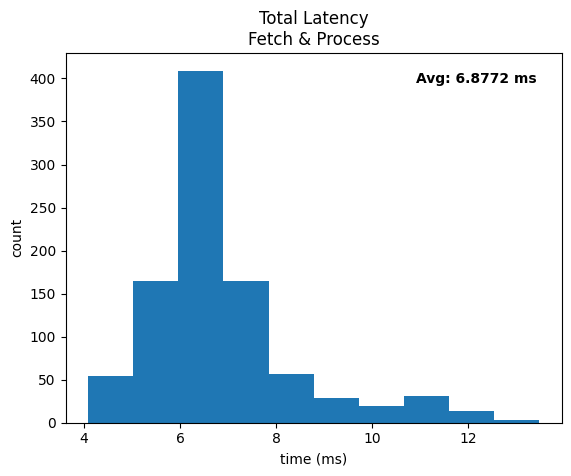

In [43]:
plt.hist(total_latency)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Total Latency\nFetch & Process")

avg_latency = round(sum(total_latency) / len(total_latency), 4)
ax = plt.gca()
plt.text(0.95, 0.95, f'Avg: {avg_latency} ms', 
         transform=ax.transAxes, 
         ha='right', va='top',
         fontsize=10, fontweight='bold')

plt.show()

In [14]:
sum(total_latency) / len(total_latency)

6.87719861839323

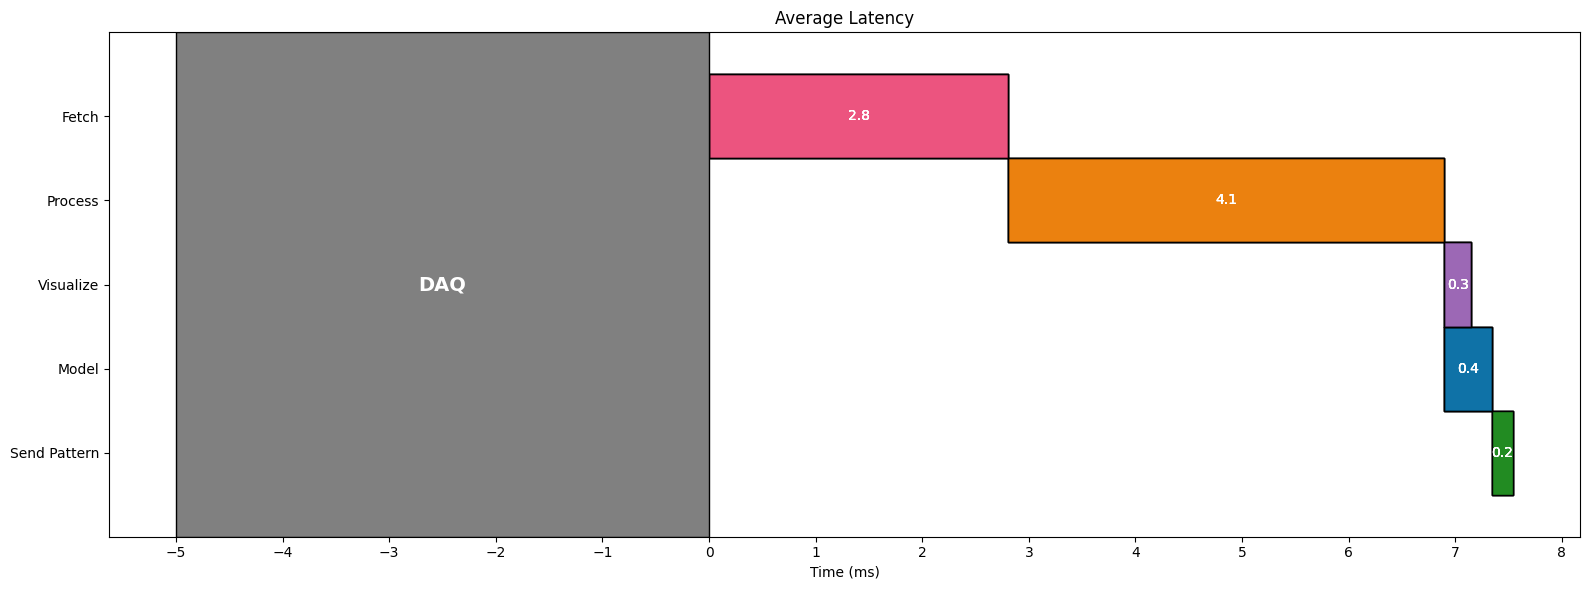

In [42]:
# def plot_broken_barh(ax, x_data, width_data, y, edgecolor, facecolor):
#     ax.broken_barh([(x, w) for x, w in zip(x_data, width_data)], (y, 1),
#  edgecolor=edgecolor, facecolor=facecolor)


# daq
daq = -5 
daq_width = 5
# fetch 
x_fetch = 0 
y = list(gen_df["latency"])
fetch_width = sum(y) / len(y)
# pre-process
x_process = fetch_width
y = list(processor_df["latency"])
processor_width = sum(y) / len(y)
# model 
x_model = x_process + processor_width
y = list(model_df["latency"])
model_width = sum(y) / len(y)
# visualize 
x_visual = x_process + processor_width
y = list(viz_df["latency"])
viz_width = sum(y) / len(y)
# send pattern 
x_pattern = x_model + model_width
y = list(pattern_df["latency"])
pattern_width = sum(y) / len(y)


fig = plt.figure(figsize=(16, 6))

# 2D subplot
ax = fig.add_subplot(1, 1, 1)

bars = [
    (x_fetch, fetch_width, 4.5, "#ec4a78ff", "#ec4a7880"),  # receive in
    (x_process, processor_width, 3.5, "#eb7a01ff", "#eb7a0180"),  # compute specs
    (x_model, model_width, 1.5, "#006aa3ff", "#006aa380"),  # inf
    (x_visual, viz_width, 2.5, "#975fb2ff", "#975fb280"),  # sent out
    (x_pattern, pattern_width, 0.5, "#228B22", "#228B22"),  # sent out
]


# # four chunks from DAQ out to in cascading from top to bottom, left to right, can flip so it goes upper right diagonal
for i in range(4):
    # plt.scatter(daq_t_diff_ms["DAQ Out"][i], y=5.5, marker='|', s=1000, c='black')  # bar on top
    # plt.scatter(daq_t_diff_ms["DAQ In"][i], y=0.5, marker='|', s=1000, c='black')  # bar on bottom
    for x_data, width_data, y, edgecolor, facecolor in bars:
        ax.broken_barh([(x_data, width_data)], (y, 1),
                       edgecolor="black", facecolor=facecolor)
        text_x = x_data + width_data / 2
        text_y = y + 0.5
        d = str(round(width_data, 1))
        ax.text(text_x, text_y, f'{d}', ha='center', va='center', color='white', fontsize=10)


ax.broken_barh([(-5, 5)], (0, 6),
                       edgecolor="black", facecolor="gray")
text_x = -5 + 5 / 2
text_y = 3
ax.text(text_x, text_y, f'DAQ', ha='center', va='center', color='white', fontsize=14, fontweight='bold')

ax.set_ylim((0, 6))
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_xticks(range(-5, 9))
ylabels = ["Fetch", "Process", "Visualize", "Model", "Send Pattern"]
ylabels.reverse()
ax.set_yticklabels(ylabels)
ax.set_xlabel("Time (ms)")

plt.title("Average Latency")
plt.tight_layout()

plt.savefig("/home/clewis/repos/realSpike/latency/latency_fig.png")

plt.show()

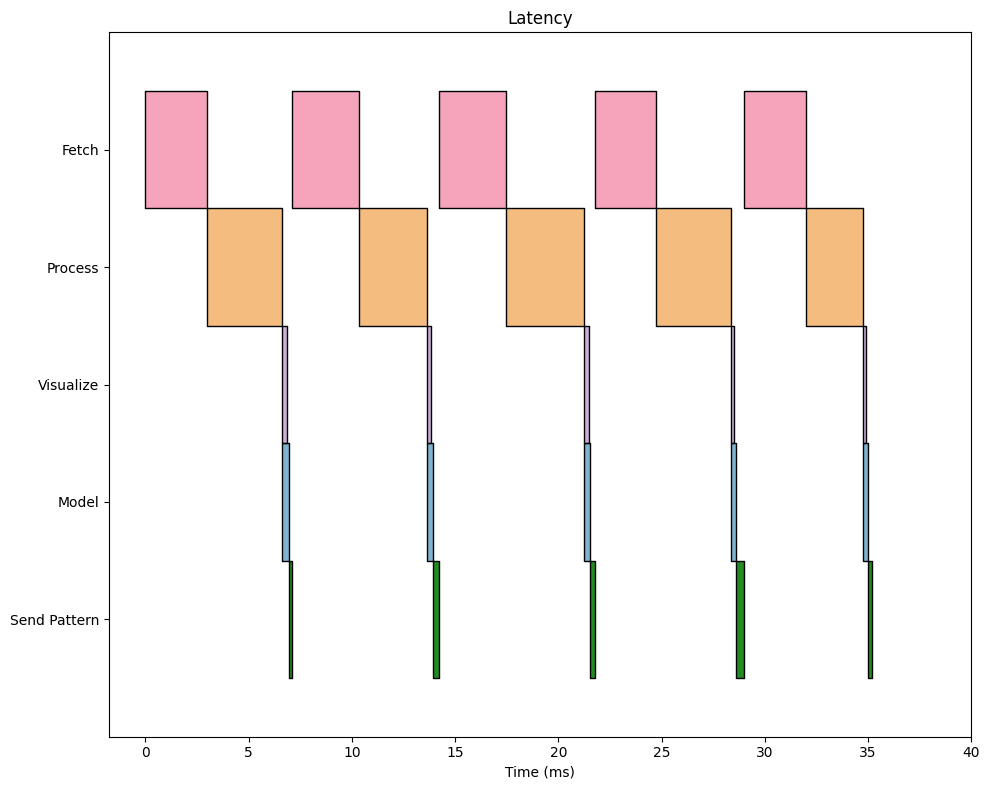

In [83]:

fetch_width = list(gen_df["latency"])[28:33]
# pre-process

processor_width = list(processor_df["latency"])[28:33]
# model 

model_width = list(model_df["latency"])[28:33]

# visualize 

viz_width = list(viz_df["latency"])[28:33]
# send pattern 

pattern_width = list(pattern_df["latency"])[28:33]

x_fetch = [0]
x_process = [fetch_width[0]]
x_model = [x_process[0]+processor_width[0]]
x_visual = [x_process[0]+processor_width[0]]
x_pattern = [x_model[0]+model_width[0]]

for i in range(1,5):
    x_fetch.append(x_pattern[i-1] + pattern_width[i-1])
    x_process.append(x_fetch[i] + fetch_width[i])
    x_model.append(x_process[i] + processor_width[i])
    x_visual.append(x_process[i] + processor_width[i])
    x_pattern.append(x_model[i] + model_width[i])


fig = plt.figure(figsize=(10, 8))

# 2D subplot
ax = fig.add_subplot(1, 1, 1)

bars = [
    (x_fetch, fetch_width, 4.5, "#ec4a78ff", "#ec4a7880"),  # receive in
    (x_process, processor_width, 3.5, "#eb7a01ff", "#eb7a0180"),  # compute specs
    (x_model, model_width, 1.5, "#006aa3ff", "#006aa380"),  # inf
    (x_visual, viz_width, 2.5, "#975fb2ff", "#975fb280"),  # sent out
    (x_pattern, pattern_width, 0.5, "#228B22", "#228B22"),  # sent out
]


# # four chunks from DAQ out to in cascading from top to bottom, left to right, can flip so it goes upper right diagonal
for i in range(5):
    # plt.scatter(daq_t_diff_ms["DAQ Out"][i], y=5.5, marker='|', s=1000, c='black')  # bar on top
    # plt.scatter(daq_t_diff_ms["DAQ In"][i], y=0.5, marker='|', s=1000, c='black')  # bar on bottom
    for x_data, width_data, y, edgecolor, facecolor in bars:
        ax.broken_barh([(x_data[i], width_data[i])], (y, 1),
                       edgecolor="black", facecolor=facecolor)
        # text_x = x_data[i] + width_data[i] / 2
        # text_y = y + 0.5
        # ax.text(text_x, text_y, f'{round(width_data, 1)}', ha='center', va='center', color='white')
        

ax.set_ylim((0, 6))
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_xticks(range(0, 41, 5))
ylabels = ["Fetch", "Process", "Visualize", "Model", "Send Pattern"]
ylabels.reverse()
ax.set_yticklabels(ylabels)
ax.set_xlabel("Time (ms)")

plt.title("Latency")
plt.tight_layout()

#plt.savefig("/home/clewis/repos/realSpike/latency/latency_fig2.png")

plt.show()